### ゲーム木(game tree) を描く例: ジジ抜き

#### パッケージのインストール
- Colab での実行について: 更新されたパッケージを有効にするには，インストール後に [RESTART RUNTIME] をクリックする

In [ ]:
import sys
from IPython.core.getipython import get_ipython


is_colab = 'google.colab' in sys.modules

try:
    import graphviz
    LEAST_MAJOR_VER_REQUIRED = 0
    LEAST_MINOR_VER_REQUIRED = 16
    maj_ver, min_ver = map(int, graphviz.__version__.split('.')[:2])
    if not (maj_ver >= LEAST_MAJOR_VER_REQUIRED and min_ver >= LEAST_MINOR_VER_REQUIRED):
        raise ModuleNotFoundError()

except ModuleNotFoundError as e:
    print(e)
    print('Installing...')

    if is_colab:
        get_ipython().system('pip install -U graphviz')


try:
    import lxml

except ModuleNotFoundError as e:
    print(e)
    print('Installing...')

    if is_colab:
        get_ipython().system('pip install lxml')



#### ゲーム木の描画
- ツリー構造の作図のために graphviz を用いる

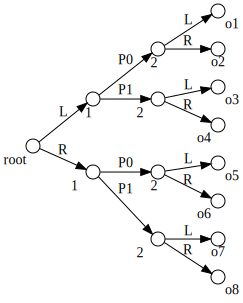

In [1]:
import itertools
import graphviz
import IPython.display


graph = graphviz.Digraph('G', filename='jiji-nuki_tree.gv', engine='dot')
graph.attr('graph', rankdir='LR', splines='line', packmode='graph', margin='0')

id_gen = itertools.count()
outcome_count_gen = itertools.count()

node_size = '0.2'
root_id = f'n{next(id_gen)}'
graph.node(root_id, label='', shape='circle', fixedsize='true', width=node_size,
            height=node_size, margin='0', xlabel='root')

action0_labels = ['L', 'R']
action1_labels = [f'<P<sub>{i}</sub>>' for i in range(2)]
action2_labels = ['L', 'R']

for a0 in action0_labels:
    l1_id = f'n{next(id_gen)}'
    graph.node(l1_id, label='', shape='circle', fixedsize='true', width=node_size,
                height=node_size, margin='0', xlabel='    1')
    graph.edge(root_id, l1_id, label=a0)

    for a1 in action1_labels:
        l2_id = f'n{next(id_gen)}'
        graph.node(l2_id, label='', shape='circle', fixedsize='true', width=node_size,
                height=node_size, margin='0', xlabel='    2')
        graph.edge(l1_id, l2_id, label=a1)
    
        for a2 in action2_labels:
            l3_id = f'n{next(id_gen)}'
            graph.node(l3_id, label='', shape='circle', fixedsize='true', width=node_size,
                    height=node_size, margin='0', xlabel=f'<o<sub>{next(outcome_count_gen)+1}</sub>>')
            graph.edge(l2_id, l3_id, label=a2, headlabel=' ')


graph.render()
IPython.display.display(graph)


#### 描画した図のダウンロード

In [ ]:
import os
import ipywidgets
import functools
import IPython.display
import sys

is_colab = 'google.colab' in sys.modules

def do_download(path, dummy_button):
    import google.colab.files
    google.colab.files.download(path)

exts = ['pdf', 'png']

for f in os.listdir():
    f_ext = f.split(os.path.extsep)[-1]

    if not os.path.isdir(f) and f_ext in exts:
        fp = os.path.abspath(f)
        
        if is_colab:
            btn = ipywidgets.Button(description=f'download: {f}', 
                                    layout={'width': '50%'})
            btn.on_click(functools.partial(do_download, fp))
            IPython.display.display(btn)

        else:
            IPython.display.display(IPython.display.FileLink(f))

#### 解説
- graphviz の機能についての解説は， `ch09_tic_tac_toe_tree.ipynb` を参照されたい。